# INM701: Neural Networks (Part 1, Original Data)

We look at using TensorFlow/Keras to create a neural network that can accurately predict protein secondary structures.

This notebook is specifically for the original data without any oversampling.

The work presented here is part of the coursework of the INM701 module at City, University of London. The Github repository can be found [here](https://github.com/yasirbarlas/City-INM701).

### Import Libraries

In [57]:
# Import Relevant Libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.saving import register_keras_serializable

# Ignore warnings (making the work easier to read)
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

Refer to the 'eda-data-processing.ipynb' workbook for more detail on how this dataset was created.

In [2]:
# Create a Pandas DataFrame of the dataset (which is a .csv file)
df = pd.read_csv('data\pdb_train_data.csv', delimiter = ",")

df

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16
...,...,...,...,...,...,...,...,...,...,...,...
9073,4LGY,A,GDGLVPRGSHMMEILRGSPALSAFRINKLLARFQAANLQVHNIYAE...,CCEEEEETTEEEEEEEEEECCCHHHHHHHHHHHHHTTCCCCEEEEE...,CCEEEEECCEEEEEEEEEECCCHHHHHHHHHHHHHCCCCCCEEEEE...,1305,False,XRAY,1.48,0.14,0.17
9074,5XH6,A,GSHMTQFEGFTNLYQVSKTLRFELIPQGKTLKHIQEQGFIEEDKAR...,CCCCCCGGGCBSSSCEEEEEEEEEEECTTHHHHHHHHTHHHHHHHH...,CCCCCCHHHCECCCCEEEEEEEEEEECCCHHHHHHHHCHHHHHHHH...,1310,False,XRAY,2.00,0.18,0.21
9075,5B2R,B,GSGHMDKKYSIGLAIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHS...,CCCCCCCCCEEEEEECSSEEEEEEECTTSCCCEEEEEEEESSSCCE...,CCCCCCCCCEEEEEECCCEEEEEEECCCCCCCEEEEEEEECCCCCE...,1372,False,XRAY,2.00,0.20,0.23
9076,5WLH,A,SNAMKISKVREENRGAKLTVNAKTAVVSENRSQEGILYNDPSRYGK...,CCCCCCCCCCCCCCCCCTTSSEEEEEEESSSCEEEEEEESSCCTTT...,CCCCCCCCCCCCCCCCCCCCCEEEEEEECCCCEEEEEEECCCCCCC...,1440,False,XRAY,1.80,0.19,0.22


In [3]:
df = df[(df['len'].between(100, 400)) & (df['has_nonstd_aa'] == False)]

df

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
1238,1G2R,A,GSHMKTRKIPLRKSVVSNEVIDKRDLLRIVKNKEGQVFIDPTGKAN...,CCCCCCCCCCCCBCTTTCCBCCGGGEEEEEECTTSCEEEETTSCCC...,CCCCCCCCCCCCECCCCCCECCHHHEEEEEECCCCCEEEECCCCCC...,100,False,XRAY,1.350,0.16,0.18
1239,1K5N,B,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,CCCBCCEEEEEESSCCCTTSCEEEEEEEEEEBSSCCEEEEEETTEE...,CCCECCEEEEEECCCCCCCCCEEEEEEEEEEECCCCEEEEEECCEE...,100,False,XRAY,1.090,0.12,0.15
1240,1MN8,C,AMGQTVTTPLSLTLGHWKDVERIAHNQSVDVKKRRWVTFCSAEWPT...,CCCCCCCCHHHHHHHTHHHHHHHHHHTTCCCCHHHHHHHHHTTGGG...,CCCCCCCCHHHHHHHCHHHHHHHHHHCCCCCCHHHHHHHHHCCHHH...,100,False,XRAY,1.000,0.13,0.17
1241,1PSR,B,SNTQAERSIIGMIDMFHKYTRRDDKIDKPSLLTMMKENFPNFLSAC...,CCCHHHHHHHHHHHHHHHTCCTTSCBCHHHHHHHHHHHCHHHHHHH...,CCCHHHHHHHHHHHHHHHCCCCCCCECHHHHHHHHHHHCHHHHHHH...,100,False,XRAY,1.050,0.11,0.14
1242,2O4T,A,GAHVSRVEKLPKDYQIVYKEIQKYLFKVGPVELNEGIGLLSEILGF...,CCCCCGGGGSCHHHHHHHHHHHHHHHHHSCCSHHHHHHHHHHHHHH...,CCCCCHHHHCCHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHH...,100,False,XRAY,1.950,0.20,0.26
...,...,...,...,...,...,...,...,...,...,...,...
7842,4X28,A,MRISYTPQQEELRRELRSYFATLMTPERREALSSVQGEYGVGNVYR...,CBCSCCHHHHHHHHHHHHHHHHHSCHHHHHHHTCCCCCCCCCCHHH...,CECCCCHHHHHHHHHHHHHHHHHCCHHHHHHHCCCCCCCCCCCHHH...,400,False,XRAY,1.990,0.15,0.19
7843,5ER9,B,STGNFDLFVVGSGFFGLTIAERAATQLGKRVLVIERRPHIGGNAYS...,CCCCCSEEEECCSHHHHHHHHHHHHHHCCCEEEECSSSSSSGGGCE...,CCCCCCEEEECCCHHHHHHHHHHHHHHCCCEEEECCCCCCCHHHCE...,400,False,XRAY,1.689,0.19,0.22
7844,5F7V,A,SMCGGGSSSGDKTEITYYQFSAPADGKALDEMVKEFEKQNPDIKVN...,CCCCCCCCCCCCEEEEEEESSCCCCCHHHHHHHHHHHHHCTTEEEE...,CCCCCCCCCCCCEEEEEEECCCCCCCHHHHHHHHHHHHHCCCEEEE...,400,False,XRAY,1.400,0.15,0.18
7845,5J71,A,SKNASLAGAPKYIEHFSKFSPSPLSMKQFLDFGSSNACEKTSFTFL...,CCCCCCCCHHHHHHHHHTSCCCCCBHHHHHCCCCCCCCHHHHHHHH...,CCCCCCCCHHHHHHHHHCCCCCCCEHHHHHCCCCCCCCHHHHHHHH...,400,False,XRAY,1.650,0.18,0.20


### Set Random Seed and $k$-mer Size

We choose a seed for reproducibility and a sensible $k$-mer size.

In [61]:
# k-mer size and seed choice

kmer_size = 3
randomer = 42

# Random Seed
random.seed(randomer)
np.random.seed(randomer)
tf.random.set_seed(randomer)
tf.config.experimental.enable_op_determinism()

### Generate $k$-mers
We convert our protein sequences in to $k$-mers, making the problem less computationally expensive. The choice of $k$ affects the performance of the model, with higher $k$ likely leading to less accurate models. This accuracy can vary based on much larger datasets, and with longer protein sequences.

For example, the 3-mers for "GQVGRQ" are:

GQV, QVG, VGR, GRQ

In [62]:
# Define k-mer function (n-gram)
def kmers(seq, k = kmer_size):
    return ([seq[i:i + k] for i in range(len(seq) - k + 1)])

# Apply the k-mer function to the amino acid sequences
df["kmers"] = df["seq"].apply(kmers)

# Find the maximum length of the sequences (we know from previously processing our dataset that it is 100)
maxlen = max(df["len"])
print("Maximum Protein Length:", maxlen)

df.head()

Maximum Protein Length: 400


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue,kmers
1238,1G2R,A,GSHMKTRKIPLRKSVVSNEVIDKRDLLRIVKNKEGQVFIDPTGKAN...,CCCCCCCCCCCCBCTTTCCBCCGGGEEEEEECTTSCEEEETTSCCC...,CCCCCCCCCCCCECCCCCCECCHHHEEEEEECCCCCEEEECCCCCC...,100,False,XRAY,1.35,0.16,0.18,"[GSH, SHM, HMK, MKT, KTR, TRK, RKI, KIP, IPL, ..."
1239,1K5N,B,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,CCCBCCEEEEEESSCCCTTSCEEEEEEEEEEBSSCCEEEEEETTEE...,CCCECCEEEEEECCCCCCCCCEEEEEEEEEEECCCCEEEEEECCEE...,100,False,XRAY,1.09,0.12,0.15,"[MIQ, IQR, QRT, RTP, TPK, PKI, KIQ, IQV, QVY, ..."
1240,1MN8,C,AMGQTVTTPLSLTLGHWKDVERIAHNQSVDVKKRRWVTFCSAEWPT...,CCCCCCCCHHHHHHHTHHHHHHHHHHTTCCCCHHHHHHHHHTTGGG...,CCCCCCCCHHHHHHHCHHHHHHHHHHCCCCCCHHHHHHHHHCCHHH...,100,False,XRAY,1.00,0.13,0.17,"[AMG, MGQ, GQT, QTV, TVT, VTT, TTP, TPL, PLS, ..."
1241,1PSR,B,SNTQAERSIIGMIDMFHKYTRRDDKIDKPSLLTMMKENFPNFLSAC...,CCCHHHHHHHHHHHHHHHTCCTTSCBCHHHHHHHHHHHCHHHHHHH...,CCCHHHHHHHHHHHHHHHCCCCCCCECHHHHHHHHHHHCHHHHHHH...,100,False,XRAY,1.05,0.11,0.14,"[SNT, NTQ, TQA, QAE, AER, ERS, RSI, SII, IIG, ..."
1242,2O4T,A,GAHVSRVEKLPKDYQIVYKEIQKYLFKVGPVELNEGIGLLSEILGF...,CCCCCGGGGSCHHHHHHHHHHHHHHHHHSCCSHHHHHHHHHHHHHH...,CCCCCHHHHCCHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHH...,100,False,XRAY,1.95,0.20,0.26,"[GAH, AHV, HVS, VSR, SRV, RVE, VEK, EKL, KLP, ..."


### Pre-processing and Padding

We use the Tokenizer class to transform our protein sequences and secondary structures into sequences of integers, where each integer is an index of a token in a dictionary. A dictionary is made for our 3-mers, and another dictionary is made for our secondary structures. Padding is performed to make the length of each sequence equal.

In [63]:
%%time

# We will use functions from Keras to pre-process our data to be used in the model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

# Create Tokenizer class for protein sequences, without making them lowercase
tok_x = Tokenizer(lower = False)
# Fit Tokenizer on protein sequences (k-mers)
tok_x.fit_on_texts(df["kmers"].values)
# Convert protein sequences into sequence of integers and pad where necessary
X = tok_x.texts_to_sequences(df["kmers"].values)
X = sequence.pad_sequences(X, maxlen = maxlen, padding = "post")

# Create Tokenizer class for secondary sequences, and treat every character (element) as a token
tok_y = Tokenizer(char_level = True)
# Fit Tokenizer on secondary structures
tok_y.fit_on_texts(df["sst3"].values)
# Convert secondary structures into sequence of integers and pad where necessary
y = tok_y.texts_to_sequences(df["sst3"].values)
y = sequence.pad_sequences(y, maxlen = maxlen, padding = "post")

X.shape, y.shape

CPU times: total: 1.34 s
Wall time: 1.34 s


((6576, 400), (6576, 400))

### Training, Validation and Test Split

We split our dataset into training, validation and test sets, where the training set is used to train the model. The validation set is used to choose a sensible model after it has been trained. The test set is used to test the performance of our final candidate model.

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = randomer)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, train_size = .8, test_size = .2, random_state = randomer)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((4208, 400), (4208, 400), (1052, 400), (1052, 400), (1316, 400), (1316, 400))

In [28]:
X_train[0], y_train[0]

(array([18, 17, 17, 17, 17, 17, 17, 18, 16,  5,  8,  2, 11, 15, 18, 18,  9,
         5,  2, 17,  6,  3, 15,  4, 11,  8,  9, 10,  3,  5, 12, 16, 14,  6,
        17, 12,  1, 13,  4,  2, 11,  9,  1, 11, 11,  2,  3, 14, 11,  5,  5,
         4,  4,  4,  2,  3,  1,  1, 17,  7,  2,  4,  5,  7, 10,  5, 18, 10,
         7,  2,  7,  9, 11,  2, 10, 14,  3,  7,  5,  4,  2,  7,  1,  4,  2,
         6, 17, 10,  5, 13,  8, 10,  1,  6, 19,  5,  5, 11,  8,  2, 17, 10,
         9,  5, 15,  4, 11, 10,  3, 13,  1,  5,  5,  8,  2,  1,  9,  4,  2,
         7,  8,  1,  7, 13,  1, 10,  6,  4,  8, 16,  2,  1,  6,  6,  5,  3,
         8,  6,  4, 19,  6, 16, 14,  8, 11,  3, 16,  7,  1, 15,  8, 19, 16,
        13, 15,  3,  9,  8, 13, 13, 18,  5, 16,  3,  1, 13, 12,  6,  5,  9,
        12, 12, 14, 14,  7,  5, 16,  2, 11,  1,  4,  8, 19,  9, 14,  8,  8,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [29]:
from sklearn.metrics import classification_report

# Simple way to find out how many instances there are of each class
report1 = classification_report(y_train.flatten(), y_train.flatten(), output_dict = True)

print("Without Oversampling:")
for i in ["0","1","2","3"]:
    print("Number in Class", i, ":", report1[i]["support"], ",", report1[i]["support"] * 100 / report1["weighted avg"]["support"], "%")

Without Oversampling:
Number in Class 0 : 934890.0 , 44.43393536121673 %
Number in Class 1 : 488611.0 , 23.222956273764257 %
Number in Class 2 : 415435.0 , 19.745009505703422 %
Number in Class 3 : 265064.0 , 12.59809885931559 %


In [30]:
from collections import defaultdict

# Function to visualise distribution of SST-3/SST-8 (taken from EDA workbook, adapted to arrays)
def sst_visualise(array, ss_types, labels, ss_colours, title):
    ss_counts = defaultdict(lambda: 0)

    for row in array:
        for element in row:
            ss_counts[element] += 1

    plt.bar(range(len(ss_types)), height = [ss_counts[ss] for ss in ss_types], tick_label = labels, edgecolor = "black", width = 0.75, zorder = 3, color = ss_colours)
    plt.title(title)
    plt.xlabel("Element")
    plt.ylabel("Frequency")
    plt.show()

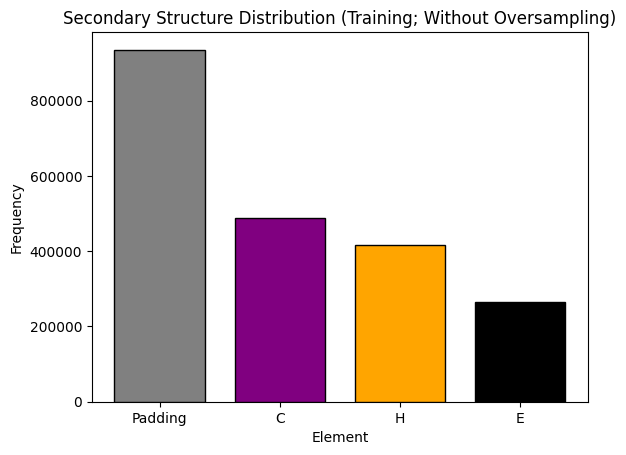

In [31]:
# Define elements for SST-3 and SST-8, and custom colours
ss_types = list(set(np.ravel(y_train)))
labels = ["Padding", "C", "H", "E"]
ss_colours = ["grey", "purple", "orange", "black"]

# Plot for training set distribution before oversampling
sst_visualise(y_train, ss_types, labels, ss_colours, "Secondary Structure Distribution (Training; Without Oversampling)")

In [32]:
# Perform One-hot Encoding (important for neural networks)

from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)
y_test_hot = to_categorical(y_test)

### Import Neural Network Functions and Define Q3 Accuracy Metric

We are interested in using neural networks for multi-output classification, so we import the relevant functions from TensorFlow. Q3 accuracy is an important metric for assessing the accuracy of our models, as it excludes the padding class in its calculations (it is otherwise equivalent to 'accuracy_score' from scikit-learn).

In [33]:
# Import relevant functions for Neural Networks

from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
# Function from KirkDCO on Kaggle (which was made by helme)

from tensorflow.keras import backend as K

def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

### Neural Network Model (Model 1, Adam)

We describe a neural network model without any regularisation, one hidden layer with the ReLU activation function, and the output layer with the Softmax activation function. The number of epochs is 150, with the batch size and learning rate as 128 and 0.001 respectively. The optimiser used is Adaptive Moment Estimation (Adam).

#### Without Oversampling

### Set Hyperparameters

In [35]:
# Select input and output dimensions (number of 3-mers and number of possible secondary structure elements (3 + padding = 4))

n_kmers = len(tok_x.word_index) + 1
n_elems = len(tok_y.word_index) + 1

# Select number of epochs, batch size, and learning rate
n_epochs = 150
batch_size = 64
learning_rate = 0.001

### Define Model 1

In [ ]:
# Define a Neural Network model (Model 1)
model_1 = Sequential()
# Create Embedding layer, which turns our indexes (3-mers) into dense vectors of fixed size - 'output_dim' can be adjusted
model_1.add(Embedding(input_dim = n_kmers, output_dim = X_train.shape[0], input_length = maxlen))
# Create Dense layers using the ReLU activation function
model_1.add(Dense(256, activation = "relu"))
model_1.add(Dense(128, activation = "relu"))
model_1.add(Dense(64, activation = "relu"))
# Create Dense layer of 4 nodes, using the Softmax activation function
model_1.add((Dense(n_elems, input_dim = y_train_hot.shape[2], activation = "softmax")))
# Display summary of model
model_1.summary()

# Dummy input tensor to force model build
dummy_input = np.zeros((1, maxlen))
model_1(dummy_input)
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (1, 400, 5260)              │         110,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 400, 256)               │       1,346,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (1, 400, 128)               │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (1, 400, 64)                │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (1, 400, 4)                 │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,498,688 (5.72 MB)

 Trainable params: 1,498,688 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model 1

We train the neural network on the training data, using the one-hot encoded variable 'y_train_hot'. The hyperparameters and model are defined as above. We use EarlyStopping to stop the training if the loss does not improve after 5 epochs.

In [37]:
%%time

from tensorflow.keras.optimizers import Adam

# Repeat seed (if needed)
np.random.seed(randomer)
tf.random.set_seed(randomer)
tf.config.experimental.enable_op_determinism()

# Use 'categorical cross-entropy' loss and the Adam optimiser with set learning rate
model_1.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate = learning_rate), metrics = ["accuracy", q3_acc])
# Stop training when loss has stopped improving, using EarlyStopping
monitor = EarlyStopping(monitor = "loss", min_delta = 1e-4, patience = 3, verbose = 1, mode = "auto")
# Create variable to store loss and accuracy history, and fit the neural network to the training data
history_1 = model_1.fit(X_train, y_train_hot, callbacks = [monitor], batch_size = batch_size, epochs = n_epochs, verbose = 1)

Epoch 1/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 962ms/step - accuracy: 0.6713 - loss: 0.6684 - q3_acc: 0.4595
Epoch 2/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7119 - loss: 0.5687 - q3_acc: 0.4854 
Epoch 3/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7122 - loss: 0.5683 - q3_acc: 0.4858 
Epoch 4/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7125 - loss: 0.5681 - q3_acc: 0.4864 
Epoch 5/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7125 - loss: 0.5680 - q3_acc: 0.4864 
Epoch 6/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7124 - loss: 0.5680 - q3_acc: 0.4862 
Epoch 7/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7123 - loss: 0.5680 - q3_acc: 0.4861 
Epoch 8/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7127 - loss: 0.5679 - q3_acc: 0.4867 
Epoch 9/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7127 - loss: 0.5678 - q3_acc: 0.4868 
Epoch 10/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7126 

In [38]:
model_1.save("models/model_3.keras")

165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.7169 - loss: 0.5595 - q3_acc: 0.4862
Accuracy: 0.714532196521759
Q3 Accuracy: 0.48625534772872925


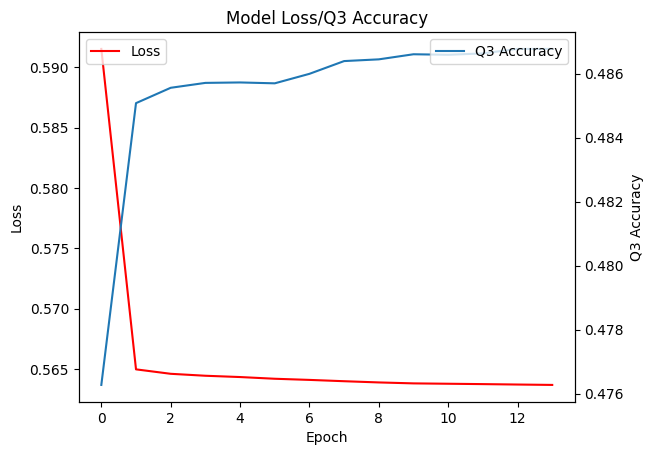

In [39]:
# Default and Q3 Accuracy for Model
evals = model_1.evaluate(X_train, y_train_hot)
print("Accuracy:", evals[1])
print("Q3 Accuracy:", evals[2])

# Plot model loss
plt.plot(history_1.history["loss"], color = "red")
plt.title("Model Loss/Q3 Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")

# Plot model Q3 accuracy
plt2 = plt.twinx()
plt2.plot(history_1.history["q3_acc"])
plt.ylabel("Q3 Accuracy")
plt2.legend(["Q3 Accuracy"], loc = "upper right")
plt.savefig("base_model_no_over.png")
plt.show()

### Test Model 1 on Validation Set

We use our trained model to predict the data in the validation set.

In [40]:
%%time

# Convert Q3 accuracy to NumPy object
def q3_num(q3_acc):
    return (sum(q3_acc) / q3_acc.shape[0]).numpy()

# Predict validation set
preds = model_1.predict(X_val)
print(f"Q3 Accuracy: {q3_num(q3_acc(y_val_hot, preds))}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step
Q3 Accuracy: 0.48477819561958313
CPU times: total: 2min 7s
Wall time: 1min 15s


### Results of Chosen Model (Model 1)

We use the model with the best validation set accuracy, which is Model 1. We test this model on the test set. We also compare the results between training on the oversampled data against training on the original data. The oversampled data training can be found in the relevant notebook, in the Github repository.

In [41]:
# Predict test set
y_pred1 = model_1.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step


===== Without Oversampling =====

Default Accuracy: 0.7217045454545454
Q3 Accuracy: 0.48861974477767944

               precision    recall  f1-score   support

     Padding   1.000000  1.000000  1.000000     48132
           C   0.554253  0.577935  0.565846     23802
           H   0.466785  0.480378  0.473484     20742
           E   0.385738  0.337357  0.359929     12924

    accuracy                       0.721705    105600
   macro avg   0.601694  0.598917  0.599815    105600
weighted avg   0.719618  0.721705  0.720388    105600



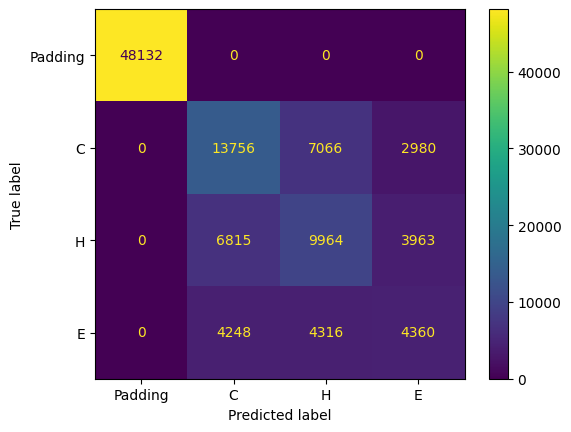

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

converted_hot = tf.argmax(y_test_hot, axis = -1).numpy()
converted_pred = tf.argmax(y_pred1, axis = -1).numpy()

print("===== Without Oversampling =====\n")

# Output useful metrics

print(f"Default Accuracy: {accuracy_score(converted_hot.flatten(), converted_pred.flatten())}")
print(f"Q3 Accuracy: {q3_num(q3_acc(y_test_hot, y_pred1))}")
print("\n", classification_report(converted_hot.flatten(), converted_pred.flatten(), target_names = ["Padding", "C", "H", "E"], digits = 6))

# Create and display confusion matrix

cm1 = confusion_matrix(converted_hot.flatten(), converted_pred.flatten())
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ["Padding", "C", "H", "E"])
disp1.plot()
disp1.figure_.savefig("data/results/nn_test_matrix.png")
plt.show()

In [64]:
# test on CASP14 dataset
df_CASP = pd.read_csv('data/processed_for_nn_predictions.csv')
df_CASP = df_CASP.rename(columns={'fixed': 'seq', 'q3': 'sst3'})

df_CASP["kmers"] = df_CASP["seq"].apply(kmers)
X_CASP = tok_x.texts_to_sequences(df_CASP["kmers"].values)
X_CASP = sequence.pad_sequences(X_CASP, maxlen = maxlen, padding = "post")
y_CASP = tok_y.texts_to_sequences(df_CASP["sst3"].values)
y_CASP = sequence.pad_sequences(y_CASP, maxlen = maxlen, padding = "post")

X_CASP.shape, y_CASP.shape

((14, 400), (14, 400))

In [68]:
# load model, ensure k-mers match

# Define or import your custom function
@register_keras_serializable()
def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

model = tf.keras.models.load_model('models/model_2.keras', custom_objects={'q3_acc': q3_acc})

In [69]:
# Predict test set
y_pred_CASP = model.predict(X_CASP)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


===== Without Oversampling =====

Default Accuracy: 0.7058928571428571
Q3 Accuracy: 0.5342194437980652

               precision    recall  f1-score   support

     Padding   0.986616  1.000000  0.993263      2064
           C   0.580114  0.680213  0.626188      1501
           H   0.523026  0.511254  0.517073      1244
           E   0.436090  0.293300  0.350718       791

    accuracy                       0.705893      5600
   macro avg   0.631461  0.621192  0.621811      5600
weighted avg   0.696914  0.705893  0.698332      5600



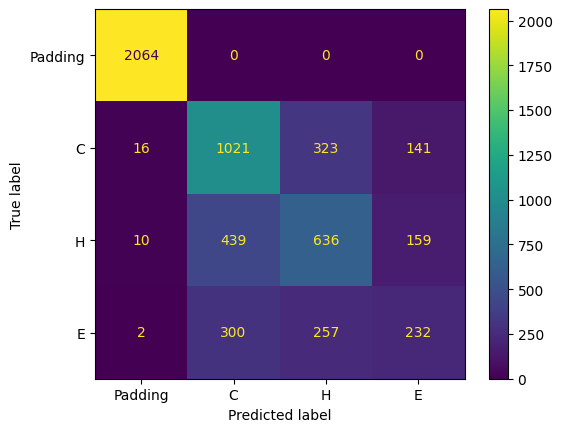

In [70]:
y_CASP_hot = to_categorical(y_CASP)
converted_hot_CASP = tf.argmax(y_CASP_hot, axis = -1).numpy()
converted_pred_CASP = tf.argmax(y_pred_CASP, axis = -1).numpy()

print("===== Without Oversampling =====\n")

# Output useful metrics

print(f"Default Accuracy: {accuracy_score(converted_hot_CASP.flatten(), converted_pred_CASP.flatten())}")
print(f"Q3 Accuracy: {q3_num(q3_acc(y_CASP_hot, y_pred_CASP))}")
print("\n", classification_report(converted_hot_CASP.flatten(), converted_pred_CASP.flatten(), target_names = ["Padding", "C", "H", "E"], digits = 6))

# Create and display confusion matrix

cm1 = confusion_matrix(converted_hot_CASP.flatten(), converted_pred_CASP.flatten())
disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ["Padding", "C", "H", "E"])
disp1.plot()
disp1.figure_.savefig("data/results/CASP_nn_test_matrix.png")
plt.show()